In [3]:
library(stringr)
library(ggplot2)

# Helper function

## data preprocessing

In [2]:
data_preprocessing = function(regions_missing,y_variable){
    # 1.data clean
    regions_order = c('USA','UK','Australia','South Africa','Germany',
                      'Japan','Israel','CHN','HK(region)','France',
                      'Spain','Mexico','Chile','Portugal','Brazil',
                      'Russia','Egypt','Qatar','India')

    if (sum(regions_missing!='')>0){
        regions_order = regions_order[-which(regions_order%in%regions_missing)]
    }

    fix_region = function(df){
        regions = rownames(df)
        regions = str_replace(regions,'United States','USA')
        regions = str_replace(regions,'United Kingdom','UK')
        regions = str_replace(regions,'China','CHN')
        regions = str_replace(regions,'South_africa','South Africa')
        regions = str_replace(regions,'Spain','Spanish')
        regions = str_replace(regions,'HK','HK(region)')
        regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
        regions = str_replace(regions,'Hong Kong','HK(region)')
        regions = str_replace(regions,'Spanish','Spain')
        regions = str_replace(regions,'Russian Federation','Russia')
        regions = str_replace(regions,'Russian','Russia')
        regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')

        rownames(df) = regions
        colnames(df) = regions

        df = df[regions_order,regions_order]
        return(df)
    }

    lowerTriangle <- function(m){
      return(m[lower.tri(m,diag = FALSE)])
    }
    
    # 1.1 x variable
    root_path = '../RSA_Regression/output_data/models_rdm/'
    # FAVEE
    favee_rdm = read.csv(paste0(root_path,'dimensional/favee_dissim_dist.csv'),
                        row.names =1, check.names = FALSE)
    favee_rdm = favee_rdm[regions_order,regions_order]
    favee_rdm_array = lowerTriangle(favee_rdm)
    # HPP
    hpp_rdm = read.csv(paste0(root_path,'categorical/hpp_dissim_dist.csv'),
                        row.names =1, check.names = FALSE)
    hpp_rdm = hpp_rdm[regions_order,regions_order]
    hpp_rdm_array = lowerTriangle(hpp_rdm)
    
    # 1.2 y variable
    y_rdm = read.csv(paste0('rdm/',y_variable,'_dist.csv'), 
                      row.names=1, encoding = "UTF-8",check.names = FALSE)
    y_rdm = fix_region(y_rdm)
    y_rdm_array = lowerTriangle(y_rdm)
    
    result_df = list()
    result_df[['favee']] = favee_rdm_array
    result_df[['hpp']] = hpp_rdm_array
    result_df[['y']] = y_rdm_array
    
    return(result_df) 
}

## plot results

In [4]:
FAVEE_plot = function(y_rdm_array,favee_rdm_array){
    favee_df = data.frame(cbind(scale(y_rdm_array),scale(favee_rdm_array)))
    colnames(favee_df) = c('y_variable','model_rdm')
    favee_df['pre'] = 'FAVEE'                      

    options(repr.plot.width = 9,repr.plot.height = 8)
    ggplot(favee_df,aes(x=model_rdm,y=y_variable,group=pre,shape=pre))+
    geom_point(aes(alpha=pre),size=10,colour='#00AFBB',stroke=3)+
    scale_shape_manual(values=c('HPP'=16,'FAVEE'=16))+
    scale_alpha_manual(values=c('HPP'=0.5,'FAVEE'=0.5))+
    geom_smooth(aes(linetype = pre),
                method = 'lm', size=3,formula = y ~ x,colour='#00AFBB')+
    scale_linetype_manual(values=c('HPP'='solid','FAVEE'='solid'))+
    theme_classic() + 
    theme(
        axis.text=element_text(size=38,color="black"),
        axis.line.x=element_line(linetype=1,color="black",size=2),
        axis.line.y=element_line(linetype=1,color="black",size=2),
        legend.position = 'none')+
    xlab('')+
    ylab('')
}

In [5]:
HPP_plot = function(y_rdm_array,hpp_rdm_array){
    hpp_df = data.frame(cbind(scale(y_rdm_array),scale(hpp_rdm_array)))
    colnames(hpp_df) = c('y_variable','model_rdm')
    hpp_df['pre'] = 'HPP'                      

    options(repr.plot.width = 9,repr.plot.height = 8)
    ggplot(hpp_df,aes(x=model_rdm,y=y_variable,group=pre,shape=pre))+
    geom_point(aes(alpha=pre),size=10,colour='#FC4E07',stroke=3)+
    scale_shape_manual(values=c('HPP'=16,'FAVEE'=16))+
    scale_alpha_manual(values=c('HPP'=0.5,'FAVEE'=0.5))+
    geom_smooth(aes(linetype = pre),colour='#FC4E07',
                method = 'lm', size=3,formula = y ~ x)+
    scale_linetype_manual(values=c('HPP'='solid','FAVEE'='solid'))+
    theme_classic() + 
    theme(
        axis.text=element_text(size=38,color="black"),
        axis.line.x=element_line(linetype=1,color="black",size=2),
        axis.line.y=element_line(linetype=1,color="black",size=2),
        legend.position = 'none')+
    xlab('')+
    ylab('')
}

In [6]:
FAVEE_HPP_plot = function(y_rdm_array,favee_rdm_array,hpp_rdm_array){
    favee_df = data.frame(cbind(scale(y_rdm_array),scale(favee_rdm_array)))
    colnames(favee_df) = c('y_variable','model_rdm')
    favee_df['pre'] = 'FAVEE'                      
    hpp_df = data.frame(cbind(scale(y_rdm_array),scale(hpp_rdm_array)))
    colnames(hpp_df) = c('y_variable','model_rdm')
    hpp_df['pre'] = 'HPP'
    data_df = rbind(favee_df,hpp_df)
    data_df$'pre' = factor(data_df$'pre', levels=c('HPP','FAVEE'))

    options(repr.plot.width = 9,repr.plot.height = 8)
    ggplot(data_df,aes(x=model_rdm,y=y_variable,shape=pre,color=pre))+
    geom_point(aes(alpha=pre),size=10,stroke=3)+
    scale_color_manual(values=c('HPP'='#FC4E07','FAVEE'='#00AFBB'))+
    scale_shape_manual(values=c('HPP'=16,'FAVEE'=16))+
    scale_alpha_manual(values=c('HPP'=0.5,'FAVEE'=0.5))+
    geom_smooth(aes(linetype = pre),
                method = 'lm', size=3,formula = y ~ x)+
    scale_linetype_manual(values=c('HPP'='solid','FAVEE'='solid'))+
    theme_classic() + 
    theme(
        axis.text=element_text(size=38,color="black"),
        axis.line.x=element_line(linetype=1,color="black",size=2),
        axis.line.y=element_line(linetype=1,color="black",size=2),
        legend.position = 'none')+
    xlab('')+
    ylab('')
}

# Individual

## Life expectancy

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


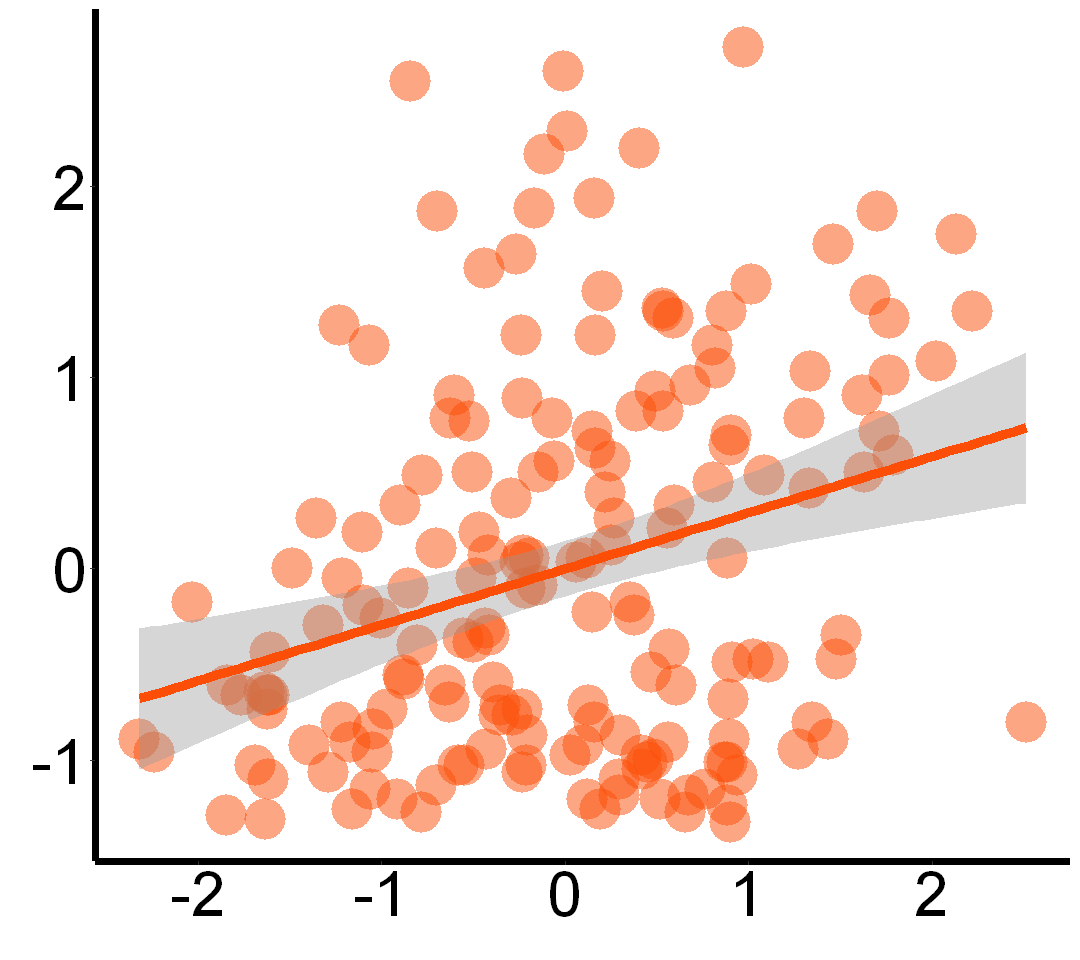

In [7]:
results_dict = data_preprocessing(regions_missing='',y_variable='checked/life_expectancy')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
HPP_plot(y_rdm_array,hpp_rdm_array)

## Youth suicide rate

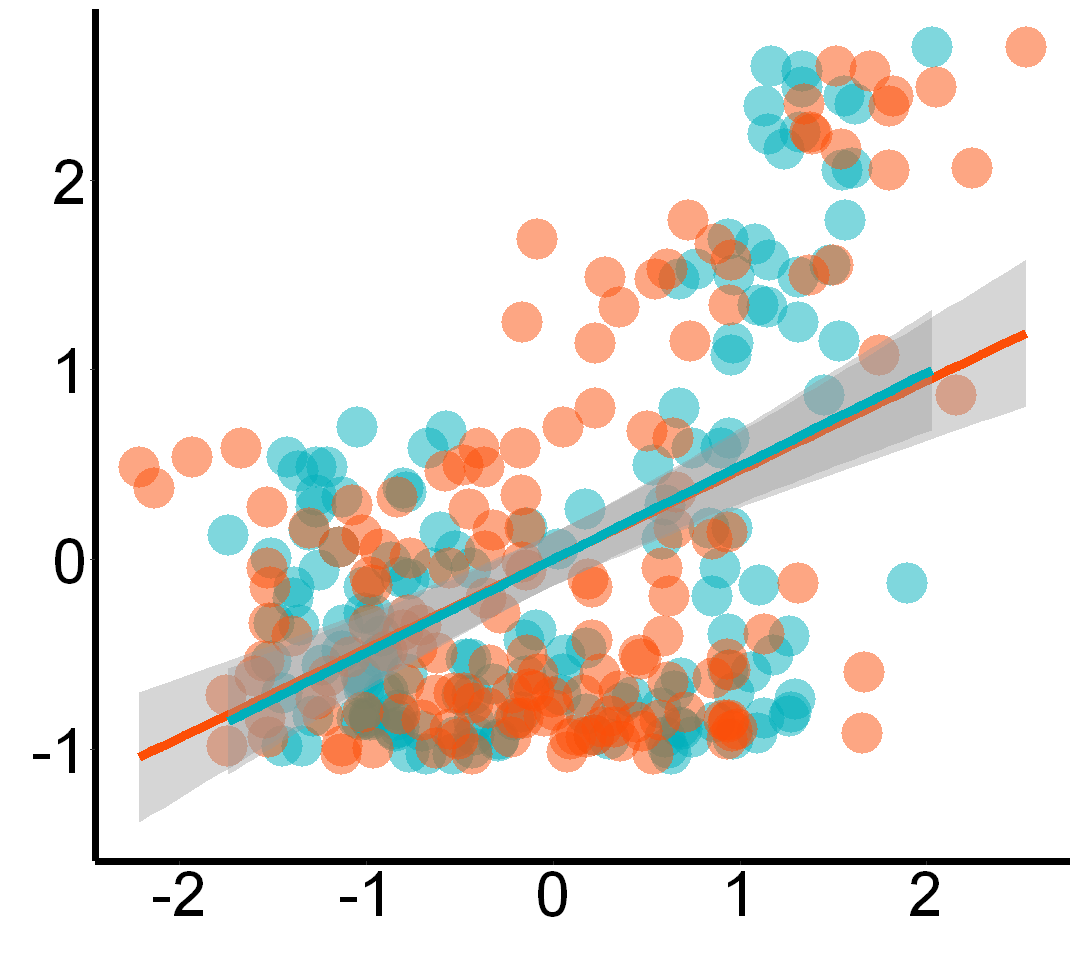

In [8]:
results_dict = data_preprocessing(regions_missing='HK(region)',y_variable='checked/young_suicide')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Subjective Well-being

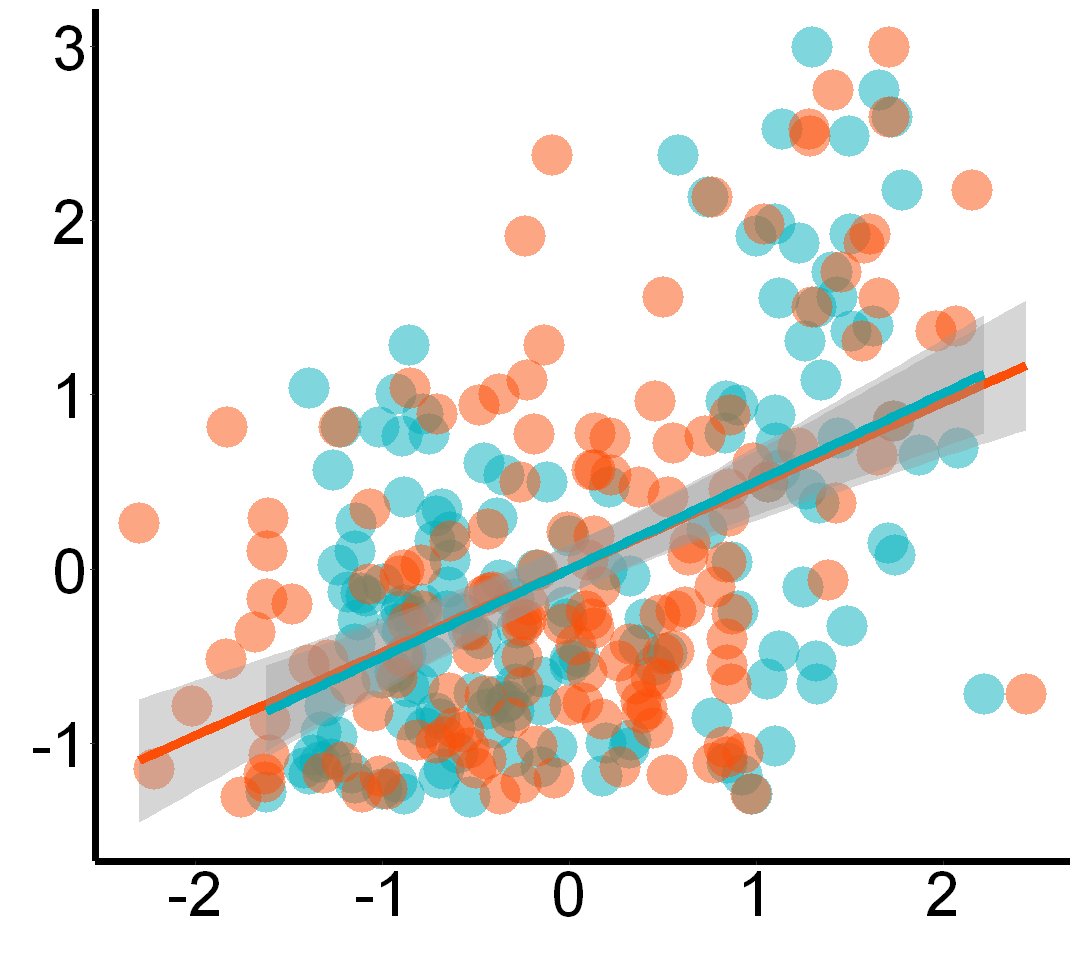

In [9]:
results_dict = data_preprocessing(regions_missing='Qatar',y_variable='checked/SWB')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## IQ

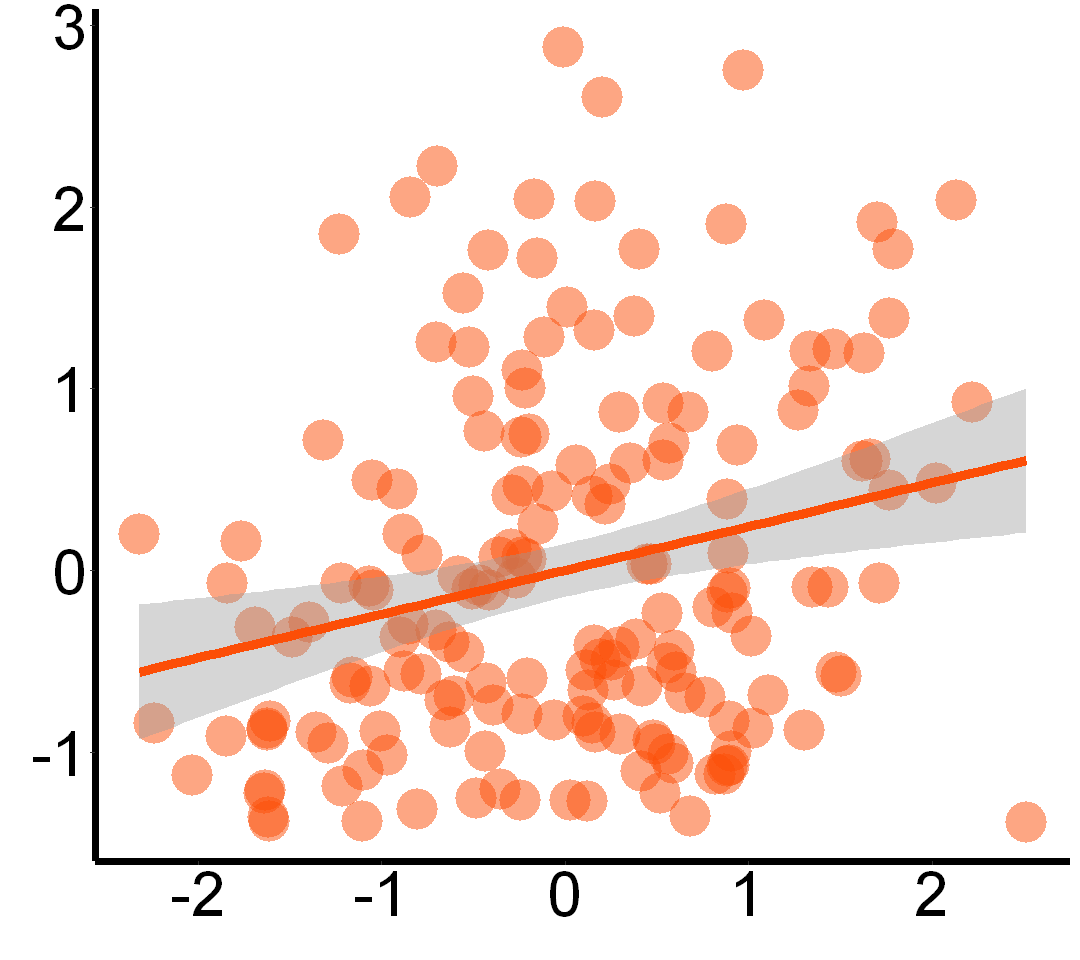

In [10]:
results_dict = data_preprocessing(regions_missing='',y_variable='checked/IQ')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
HPP_plot(y_rdm_array,hpp_rdm_array)

## Positive affect

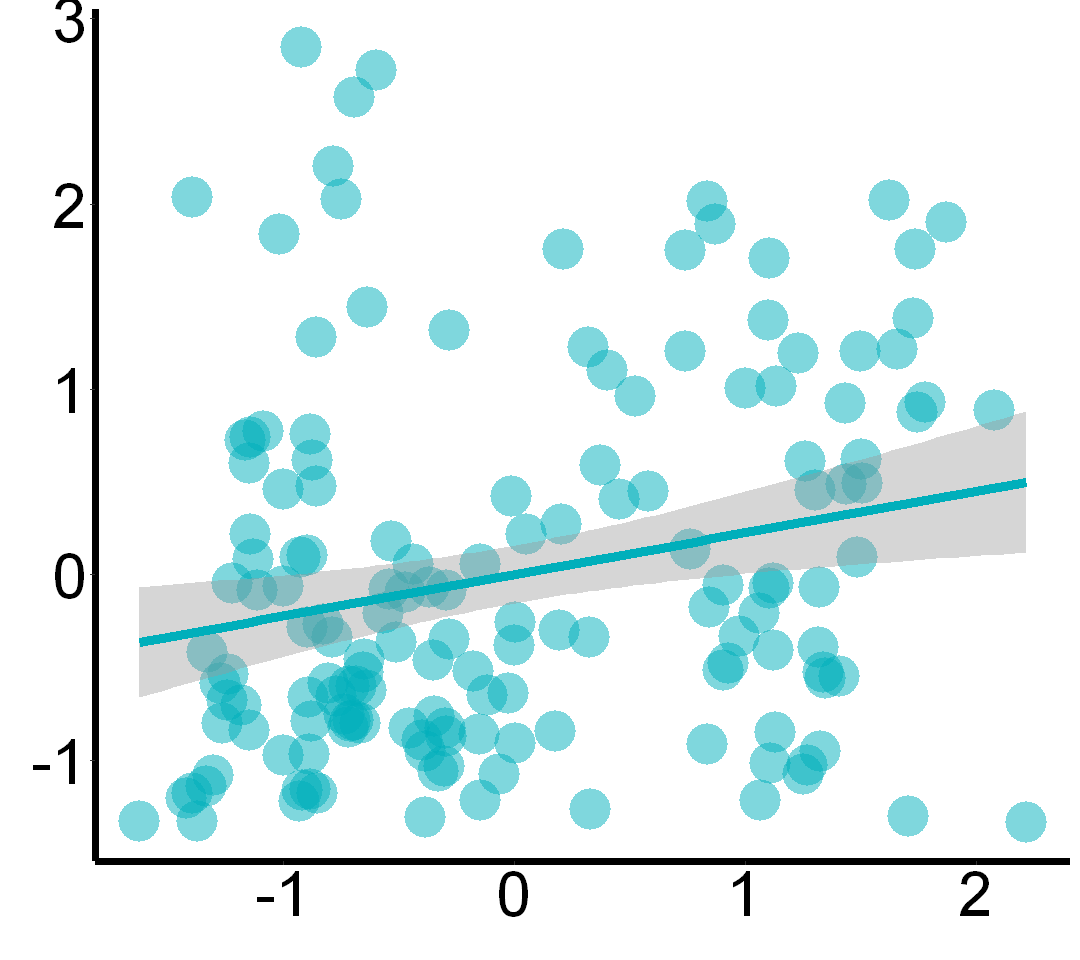

In [11]:
results_dict = data_preprocessing(regions_missing='Qatar',y_variable='checked/IQ')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)

# Interpersonal

## Trust your family

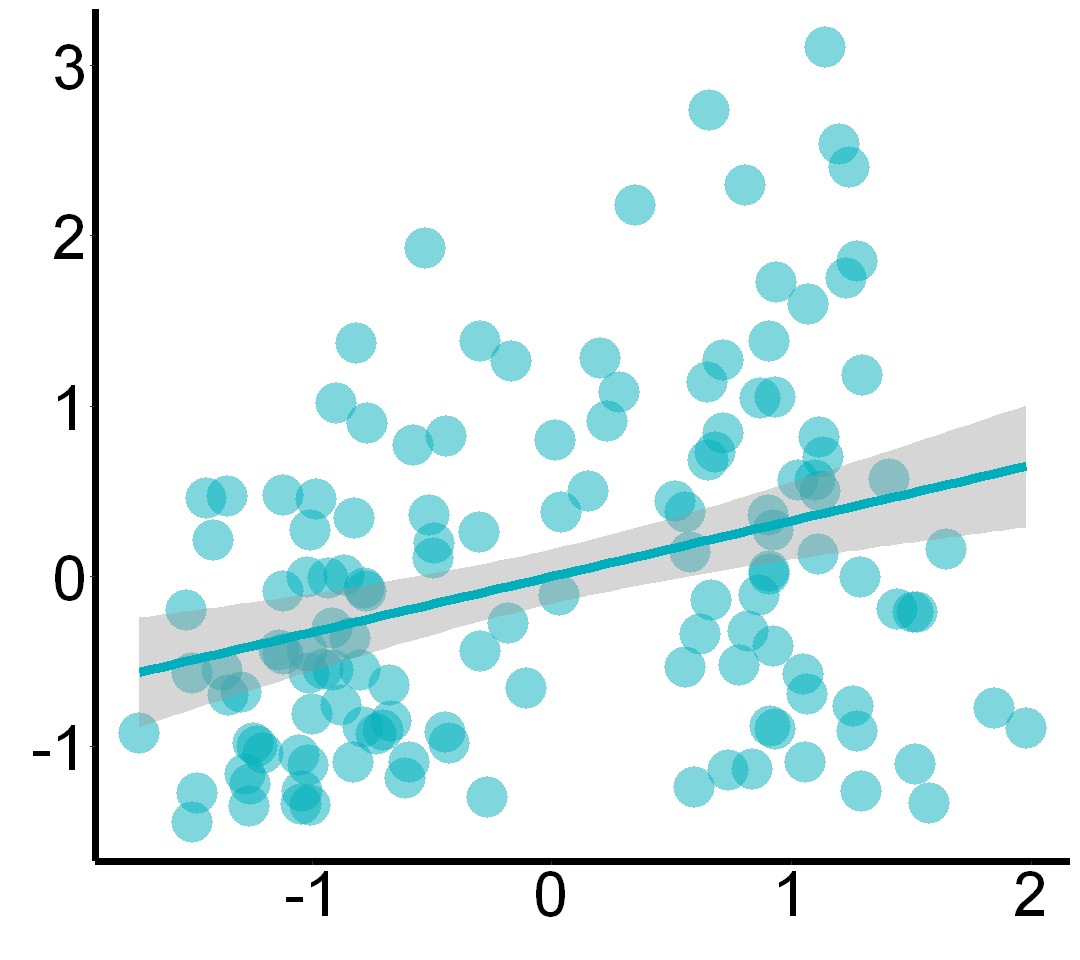

In [12]:
results_dict = data_preprocessing(regions_missing=c('France','Israel'),
                                  y_variable='checked/trust_family')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)

## Trust your neighborhood

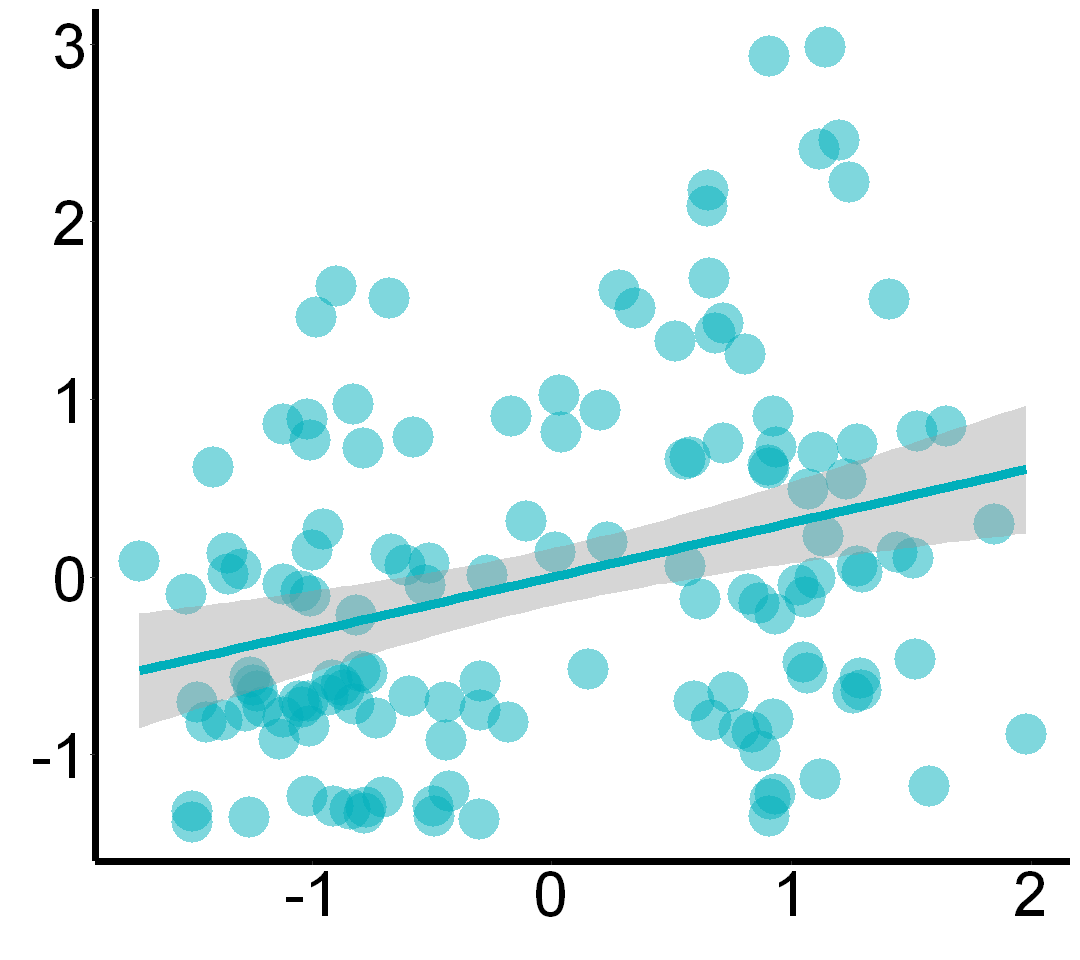

In [13]:
results_dict = data_preprocessing(regions_missing=c('France','Israel'),
                                  y_variable='checked/trust_neighborhood')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)

## Social support

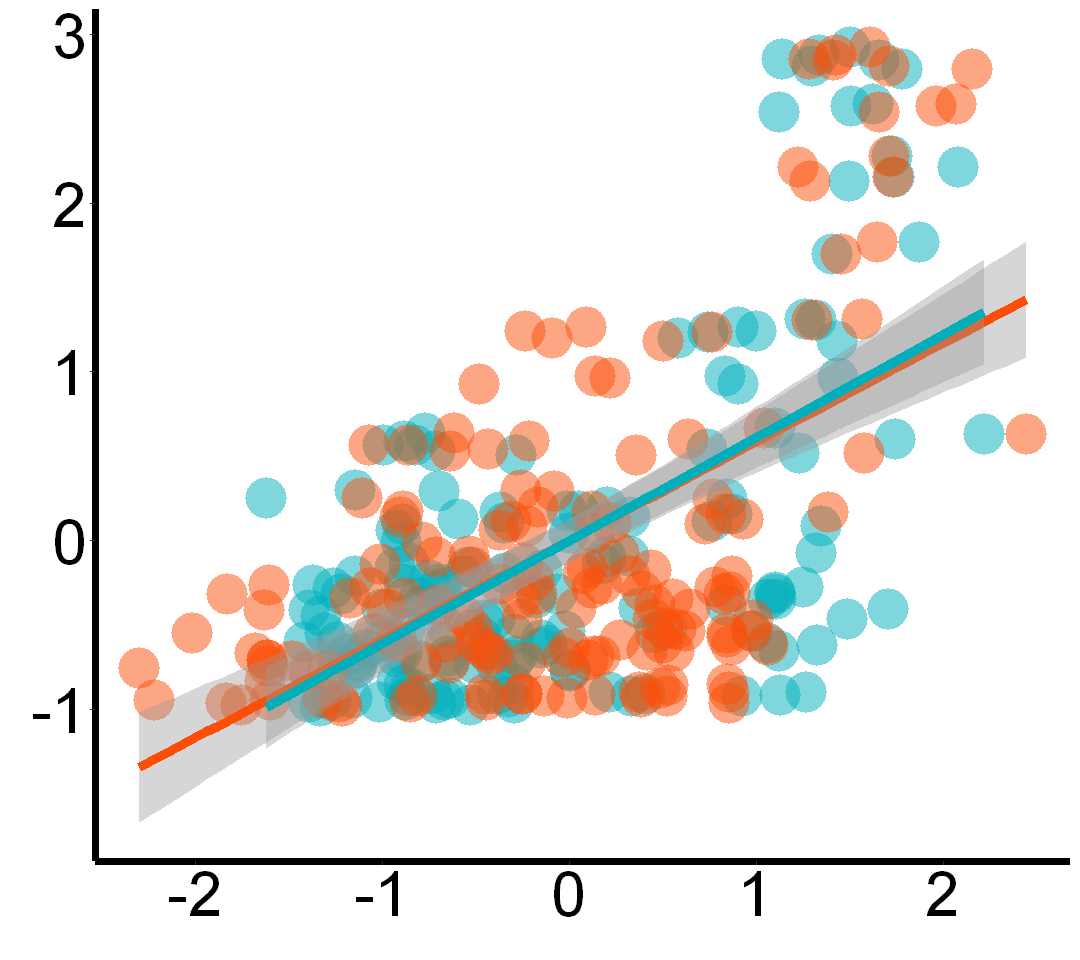

In [14]:
results_dict = data_preprocessing(regions_missing=c('Qatar'),
                                  y_variable='checked/social_support')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Marriage

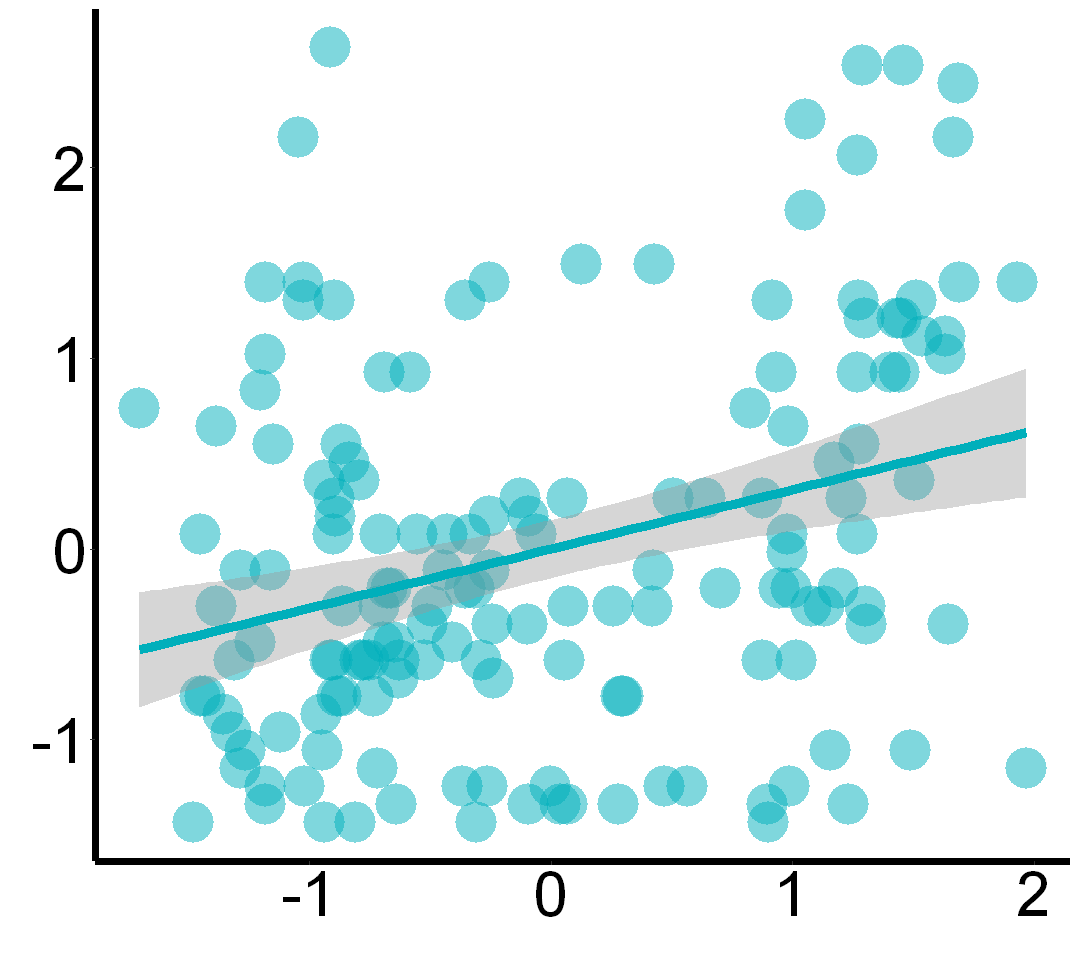

In [15]:
results_dict = data_preprocessing(regions_missing=c('India'),
                                  y_variable='checked/marriage')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)

## Divorce

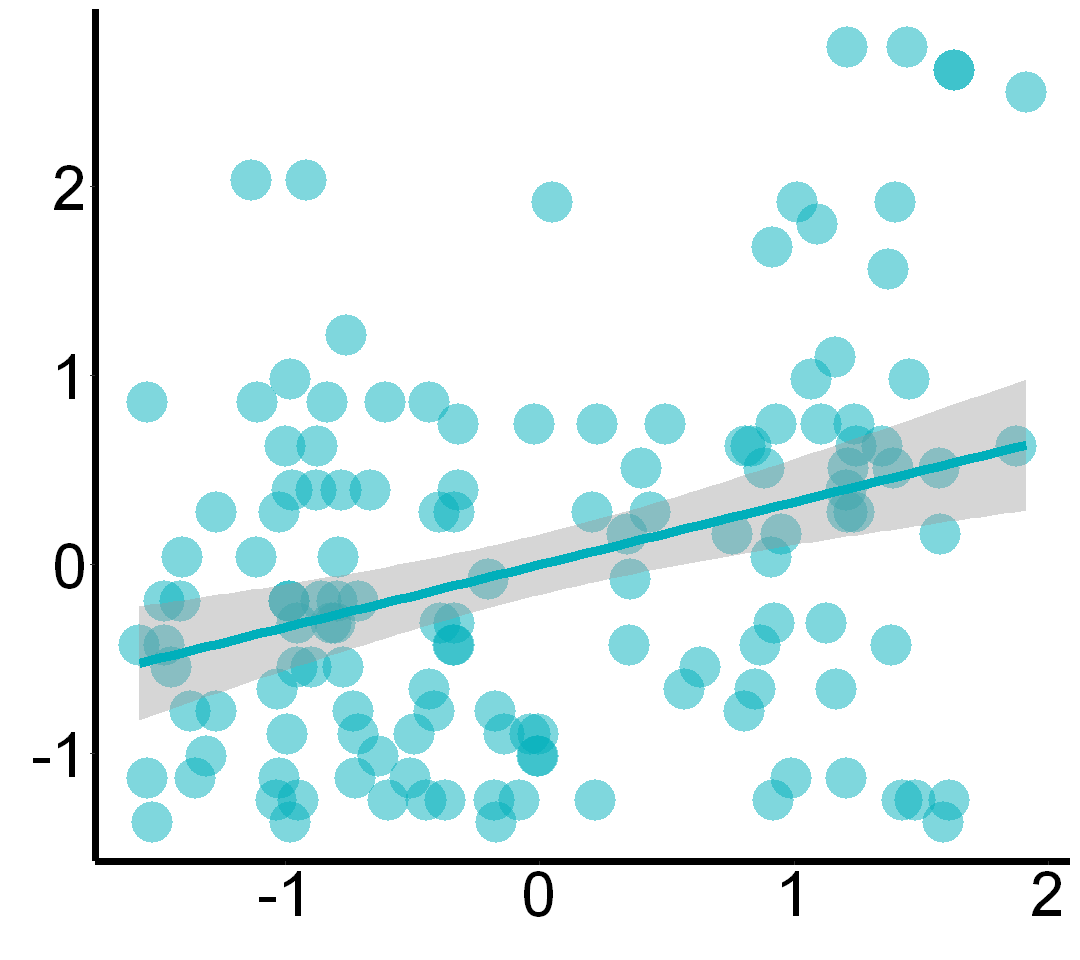

In [16]:
results_dict = data_preprocessing(regions_missing=c('India','Chile'),
                                  y_variable='checked/divorce')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)

## Intergroup differentiation

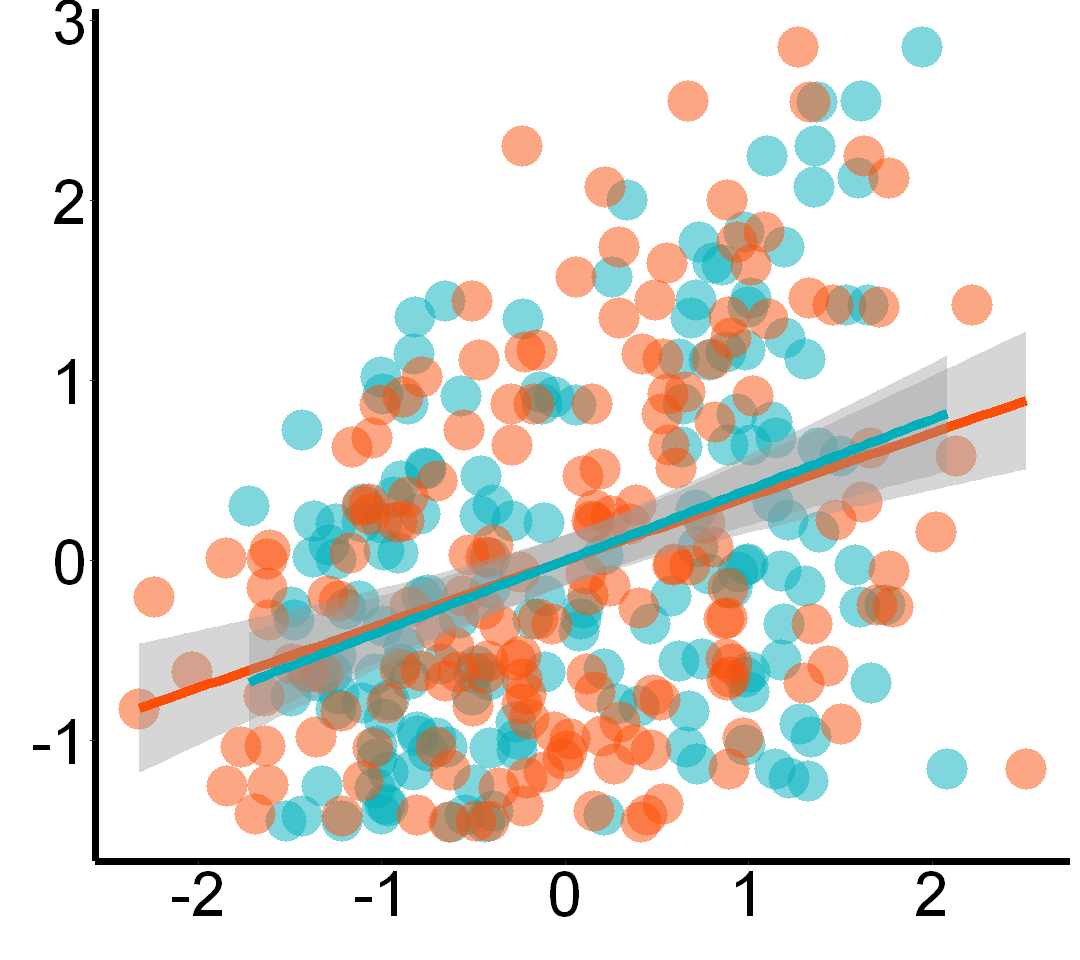

In [17]:
results_dict = data_preprocessing(regions_missing=c(''),
                                  y_variable='checked/prejudice_ECD')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

# Societal

## Confidence in government

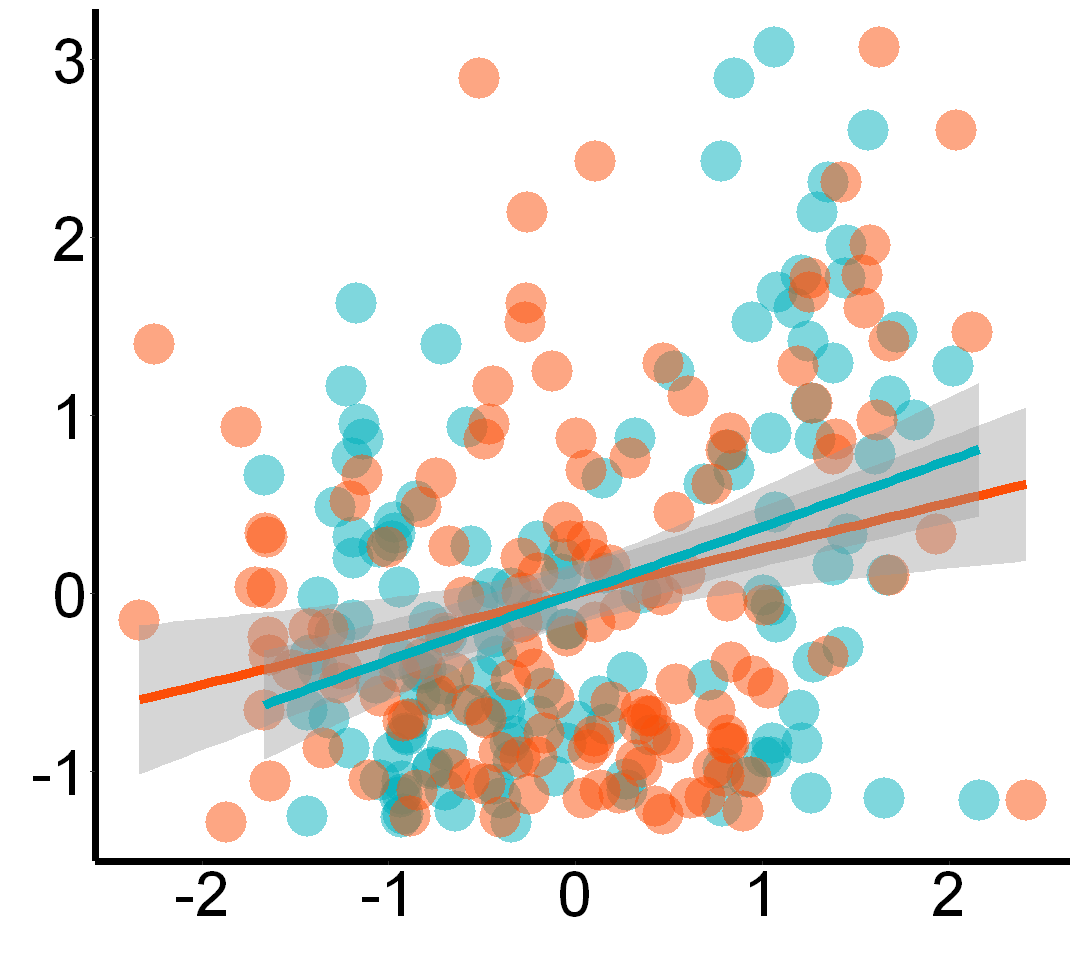

In [24]:
results_dict = data_preprocessing(regions_missing=c('CHN', 'Qatar'),
                                  y_variable='checked/Institutional_trust')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Sustainable Child Development Index

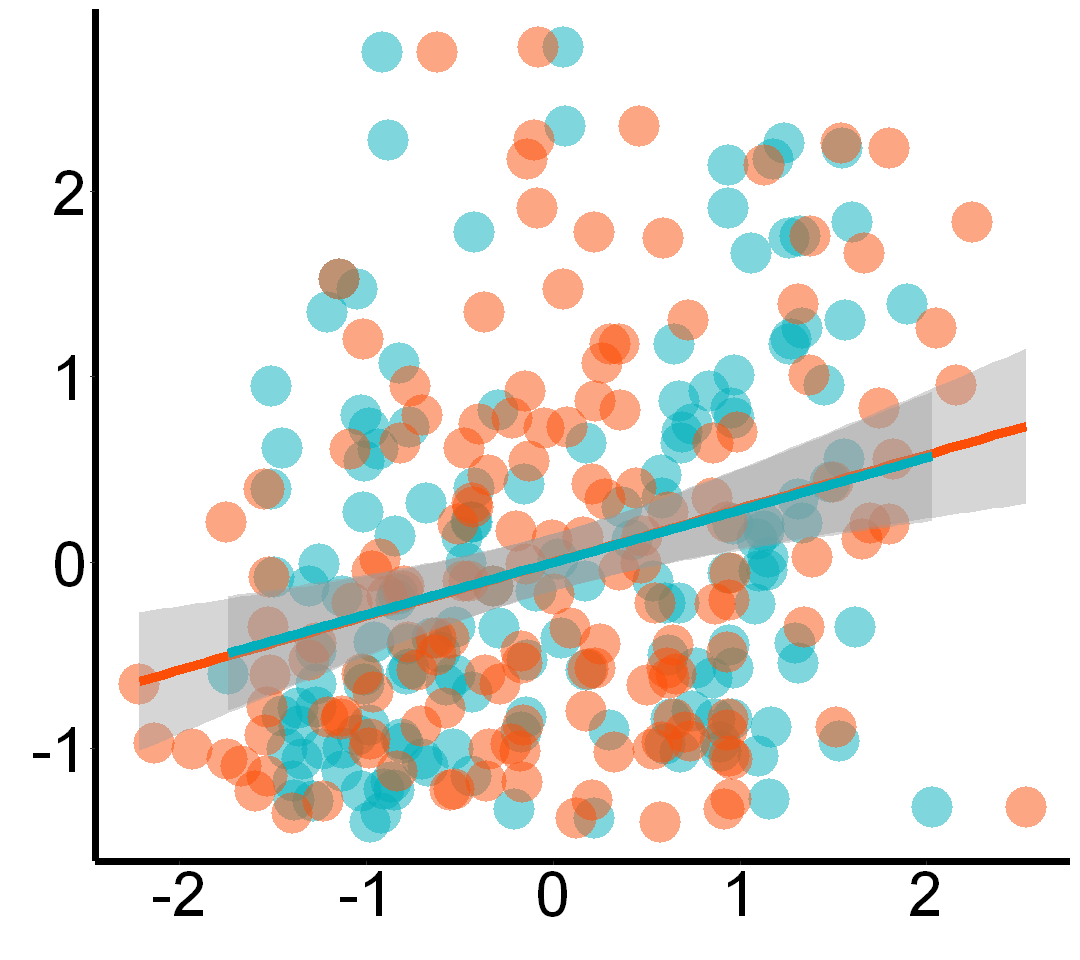

In [25]:
results_dict = data_preprocessing(regions_missing=c('HK(region)'),
                                  y_variable='checked/Sustained_CDI')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Human Development Index

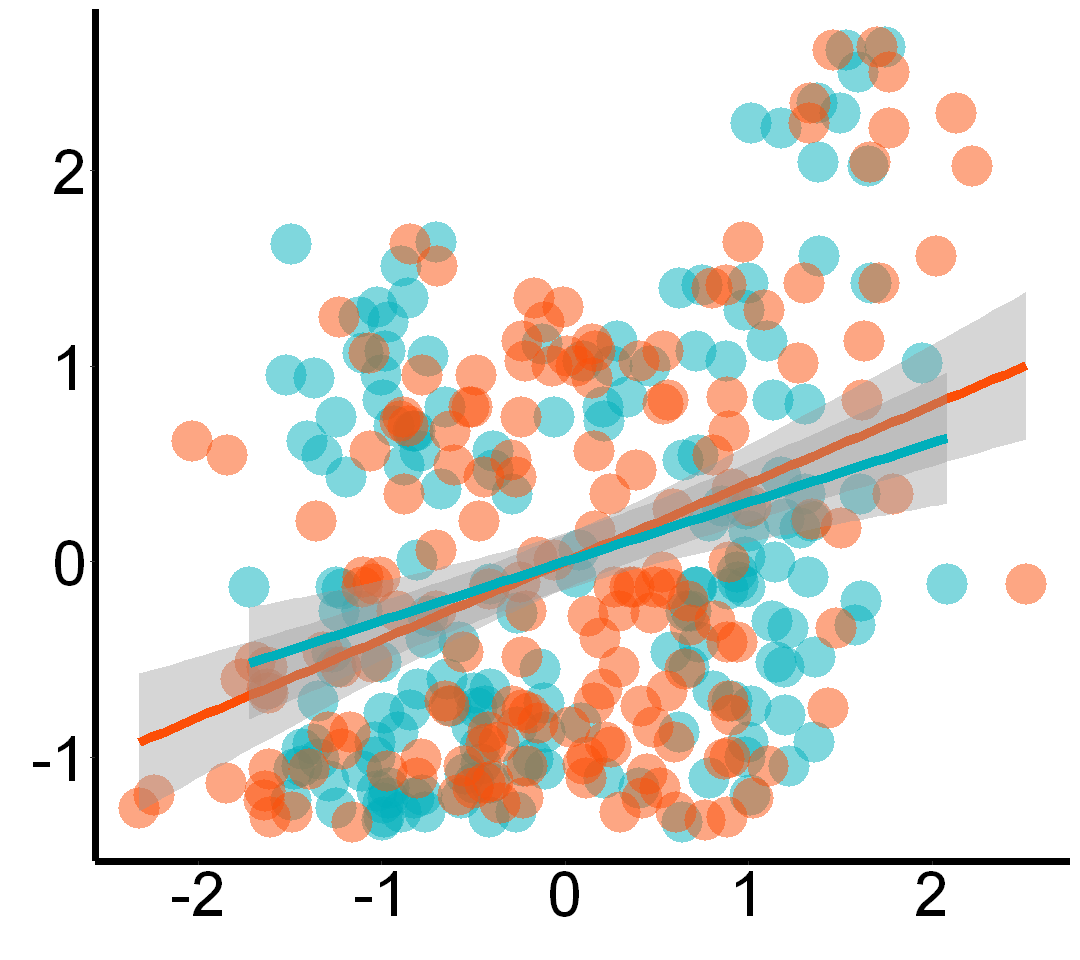

In [26]:
results_dict = data_preprocessing(regions_missing=c(''),
                                  y_variable='checked/HDI')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Gender Inequality Index

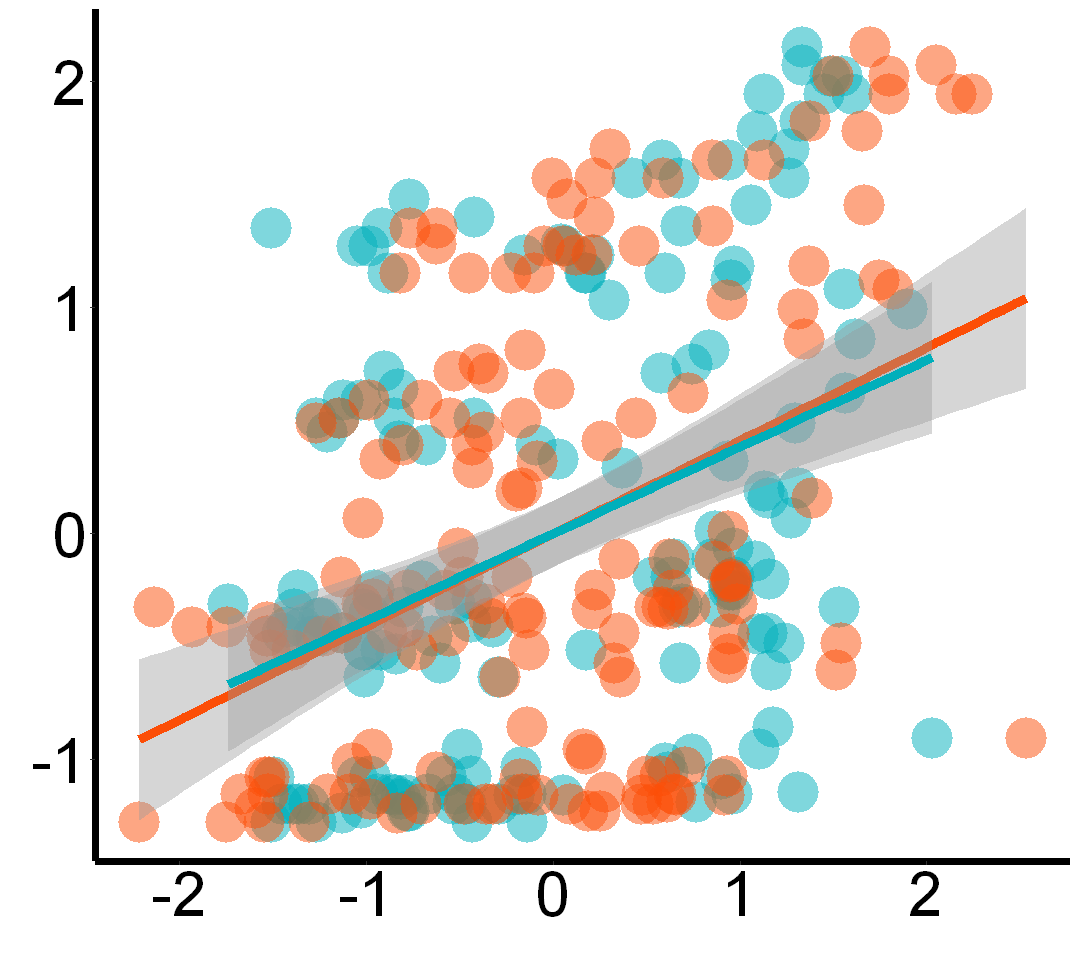

In [27]:
results_dict = data_preprocessing(regions_missing=c('HK(region)'),
                                  y_variable='checked/Gender_equal')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Corruption

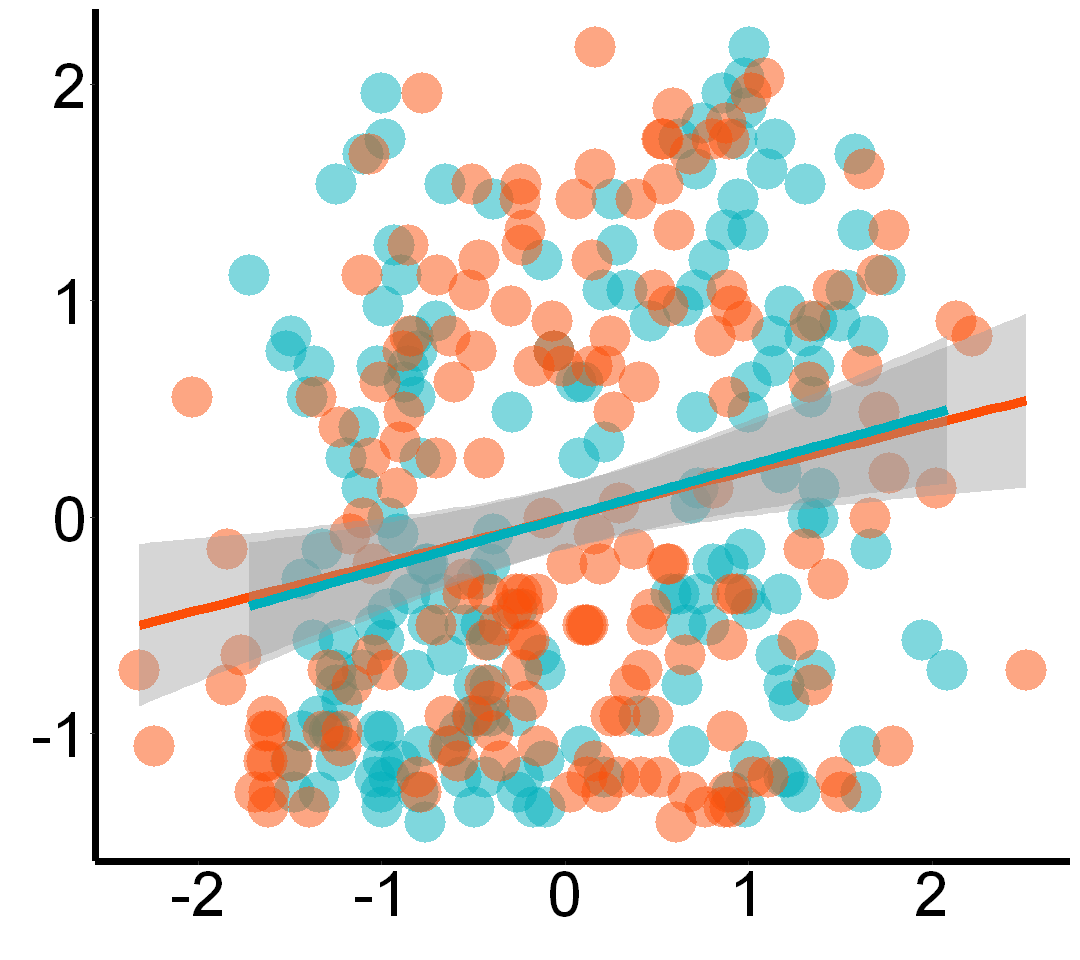

In [28]:
results_dict = data_preprocessing(regions_missing=c(''),
                                  y_variable='checked/corruption')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_HPP_plot(y_rdm_array,favee_rdm_array,hpp_rdm_array)

## Democracy

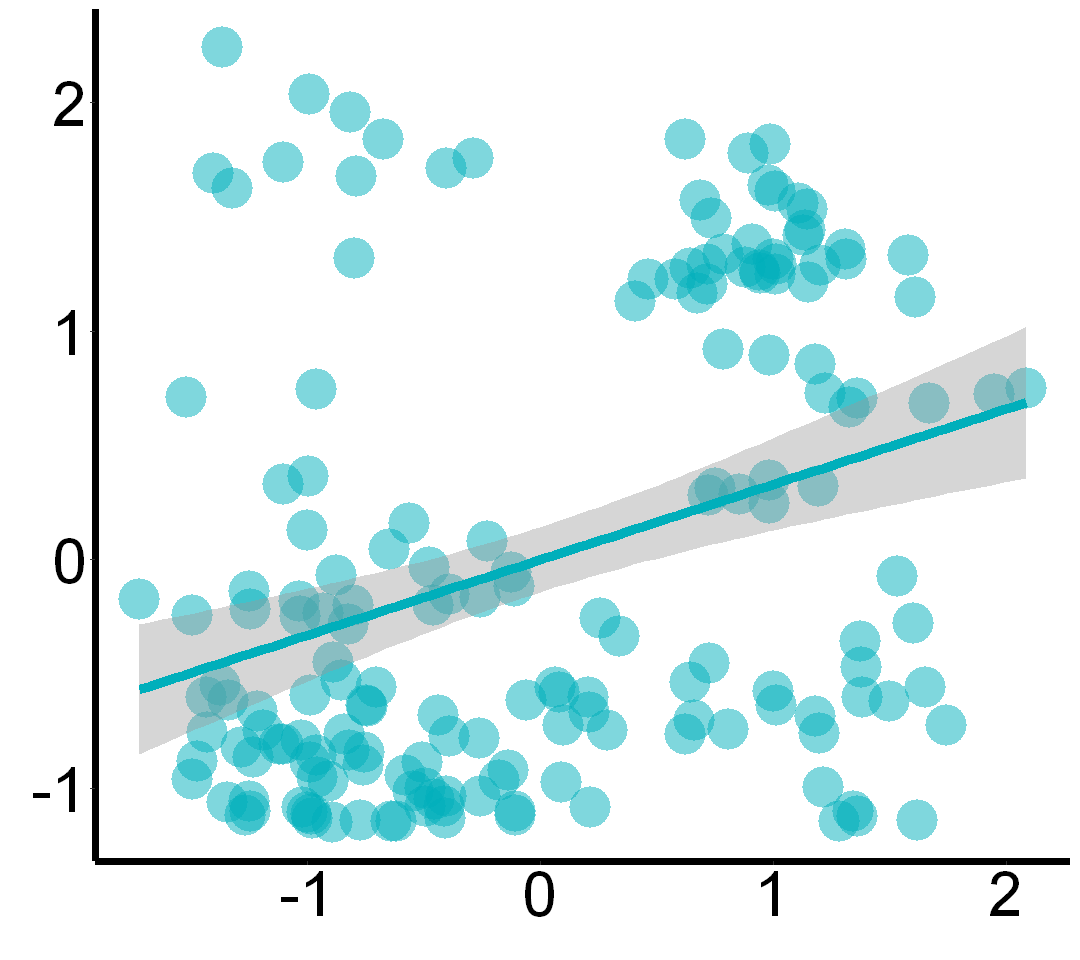

In [29]:
results_dict = data_preprocessing(regions_missing=c(''),
                                  y_variable='checked/democracy')
y_rdm_array = results_dict[['y']]
favee_rdm_array = results_dict[['favee']]
hpp_rdm_array = results_dict[['hpp']]
FAVEE_plot(y_rdm_array,favee_rdm_array)